In [1]:
x_vectors = [
    (8.0, 12.0),
    (7.0, 4.0),
    (9.0, 11.0),
    (5.0, 9.0),
    (8.0, 8.0),
    (4.0, 6.0),
    (5.0, 11.0),
    (10.0, 17.0),
    (6.0, 11.0),
    (4.0, 9.0),
    (5.0, 16.0),
    (4.0, 7.0),
]

Y_vector = [
    434.6056050,
    99.4576048,
    426.5185028,
    219.8754453,
    261.1813246,
    113.2138322,
    293.0785722,
    811.3168444,
    325.0937345,
    209.3121888,
    506.5148699,
    140.8936827,
]

x_noise_check = (4.0, 8.0)

y_noise_check = [
    185.8041733,
    189.7014111,
    187.8794151,
    190.7171421,
    192.7927908,
    193.4331172,
    185.9415325,
    185.9871731,
    194.3002881,
    191.4144151,
]

In [2]:
# составные уравнения регрессии
def f_x1(x1, x2):
    return x1
f_x1.__name__ = "x₁"

def f_x2(x1, x2):
    return x2
f_x2.__name__ = "x₂"

def f_x1x1(x1, x2):
    return x1 ** 2
f_x1x1.__name__ = "x₁²"

def f_x1x2(x1, x2):
    return x1 * x2
f_x1x2.__name__ = "x₁x₂"

def f_x2x2(x1, x2):
    return x2 ** 2
f_x2x2.__name__ = "x₂²"

def f_x2x2x1(x1, x2):
    return x2 ** 2 *x1
f_x2x2x1.__name__ = "x₁x₂²"

def f_x1x1x2(x1, x2):
    return x1 ** 2 *x2
f_x1x1x2.__name__ = "x₁²x₂"

# возможные слагаемые уравнения регрессии
polynom_parts = [f_x1, f_x2, f_x1x2, f_x1x1, f_x2x2]


In [3]:
import lab5_regression

polynoms = lab5_regression.get_polynom_list(polynom_parts,3)
print('Список возможных полиномов')
for index,polynom in enumerate(polynoms,start=1):
    print('{}. {}'.format(index,' + '.join(lab5_regression.get_functions_labels(polynom))))

Список возможных полиномов
1. x₁x₂ + x₂ + x₁
2. x₁² + x₂ + x₁
3. x₂² + x₂ + x₁
4. x₁² + x₁x₂ + x₁
5. x₂² + x₁x₂ + x₁
6. x₂² + x₁² + x₁
7. x₁² + x₁x₂ + x₂
8. x₂² + x₁x₂ + x₂
9. x₂² + x₁² + x₂
10. x₂² + x₁² + x₁x₂


In [4]:
F_matrices = lab5_regression.get_all_F_matrices(polynoms,x_vectors)
a_vectors = lab5_regression.get_all_a_vectors(F_matrices,Y_vector)
best1_index,best2_index = lab5_regression.get_best_polynom(F_matrices,a_vectors,Y_vector,polynoms)

print('Лучшие полиномы:')
print('R² через QR: ',' + '.join(lab5_regression.get_functions_labels(polynoms[best1_index])))
print('R² через Qstop: ',' + '.join(lab5_regression.get_functions_labels(polynoms[best2_index])))

1.  4.3395 x₁x₂ + 12.63661 x₂ + -14.85473 x₁  Rr: 0.9844168175198087 Rост:  0.9935220024997524
2.  7.5885 x₁² + 40.28835 x₂ + -66.12757 x₁  Rr: 0.9951115915334204 Rост:  0.991580466562496
3.  2.59578 x₂² + -14.00299 x₂ + 26.50111 x₁  Rr: 0.9277305511370146 Rост:  0.9728269166592233
4.  -3.24687 x₁² + 6.2375 x₁x₂ + 7.85926 x₁  Rr: 0.9840643713939677 Rост:  0.9891928211951432
5.  1.07002 x₂² + 2.89199 x₁x₂ + 0.95272 x₁  Rr: 1.0085387173824405 Rост:  0.9993237710303345
6.  1.93084 x₂² + 2.68162 x₁² + -2.90833 x₁  Rr: 1.0033622103033342 Rост:  0.9889365337929491
7.  -2.0437 x₁² + 5.43998 x₁x₂ + 5.05622 x₂  Rr: 0.9667963894671152 Rост:  0.9911920896761623
8.  0.99591 x₂² + 2.9445 x₁x₂ + 1.14978 x₂  Rr: 0.9987387871299906 Rост:  0.9994723448920507
9.  1.89924 x₂² + 2.36179 x₁² + 0.16008 x₂  Rr: 0.962241868194272 Rост:  0.9883981051932157
10.  1.04104 x₂² + -0.02687 x₁² + 3.03552 x₁x₂  Rr: 1.025175381449643 Rост:  0.9992270864215934
Лучшие полиномы:
R² через QR:  x₂² + x₁² + x₁x₂
R² через Qst

In [5]:
import numpy as np
print('Дисперсия гауссовского шума по Y: ',np.var(y_noise_check))

Дисперсия гауссовского шума по Y:  9.494675219257338


### Уравнение через $Q_R$

1.04104 x₂² + -0.02687 x₁² + 3.03552 x₁x₂


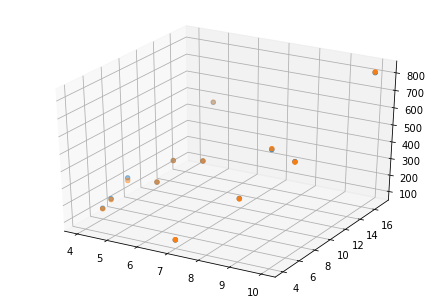

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print(lab5_regression.get_regression_equation
(
    lab5_regression.get_functions_labels(polynoms[best1_index])
    ,a_vectors[best1_index])
)

x1_list,x2_list = [],[]
for i in x_vectors:
    x1_list.append(i[0])
    x2_list.append(i[1])

y_cap_vector = F_matrices[best1_index].dot(a_vectors[best1_index])

fig = plt.figure()
axes = Axes3D(fig)
axes.scatter(np.array(x1_list), np.array(x2_list), np.array(Y_vector))
axes.scatter(np.array(x1_list), np.array(x2_list), np.array(y_cap_vector))
plt.show()

### Уравнение через $Q_{stop}$

0.99591 x₂² + 2.9445 x₁x₂ + 1.14978 x₂


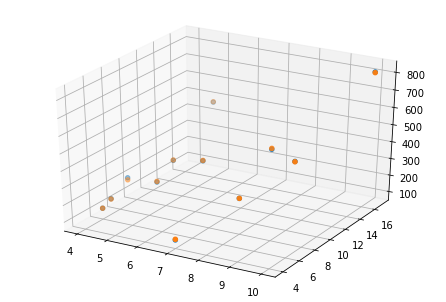

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print(lab5_regression.get_regression_equation
(
    lab5_regression.get_functions_labels(polynoms[best2_index])
    ,a_vectors[best2_index])
)

x1_list,x2_list = [],[]
for i in x_vectors:
    x1_list.append(i[0])
    x2_list.append(i[1])


y_cap_vector = F_matrices[best2_index].dot(a_vectors[best2_index])
fig = plt.figure()
axes = Axes3D(fig)
axes.scatter(np.array(x1_list), np.array(x2_list), np.array(Y_vector),label = 'Исходные данные')
axes.scatter(np.array(x1_list), np.array(x2_list), np.array(y_cap_vector),label = 'Полученные значения')
plt.show()

1.07002 x₂² + 2.89199 x₁x₂ + 0.95272 x₁


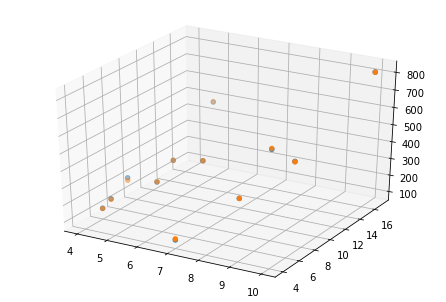

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print(lab5_regression.get_regression_equation
(
    lab5_regression.get_functions_labels(polynoms[4])
    ,a_vectors[4])
)

x1_list,x2_list = [],[]
for i in x_vectors:
    x1_list.append(i[0])
    x2_list.append(i[1])


y_cap_vector = F_matrices[4].dot(a_vectors[4])
fig = plt.figure()
axes = Axes3D(fig)
axes.scatter(np.array(x1_list), np.array(x2_list), np.array(Y_vector),label = 'Исходные данные')
axes.scatter(np.array(x1_list), np.array(x2_list), np.array(y_cap_vector),label = 'Полученные значения')
plt.show()